In [80]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

df= pd.read_csv('Resting_Metabolic_Rate,_Women_1919-1992.csv')


In [42]:
df.head()

,Yr,Number,Age,Height,Weight,BMI,RMR,IS_ATHLETE,RMR/Kg,Unnamed: 9
0,1992,21,18,166,62.3,22.6,1402,*,22.5,NaN
1,1992,20,20,170,62.1,21.5,1574,NaN,25.3,NaN
2,1992,40,21,169,110.2,38.6,2074,NaN,18.8,NaN
3,1992,2,23,157,48.1,19.5,1372,NaN,28.5,NaN
4,1992,4,23,158,50.8,20.3,1146,*,22.6,NaN


I cut and pasted this all from several solutions posted to Stack Overflow.  I probably should kame a function to eliminate some of the redundancy.  Sue me.

<ipython-input-97-c3f77b068d04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_women_1992['trendline'] = p(young_women_1992['BMI'])
<ipython-input-97-c3f77b068d04>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_women_1919['trendline'] = p(young_women_1919['BMI'])
<ipython-input-97-c3f77b068d04>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

<AxesSubplot:xlabel='BMI', ylabel='RMR/Kg'>

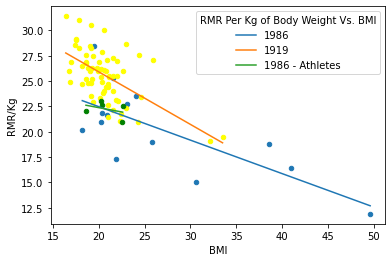

In [97]:
young_women_1992 = df[(df['Yr']==1992) & (df['Age']<30) & (df['IS_ATHLETE']!="*")]
z = np.polyfit(x=young_women_1992['BMI'], y=young_women_1992['RMR/Kg'], deg=1)
p = np.poly1d(z)
young_women_1992['trendline'] = p(young_women_1992['BMI'])
young_women_1992.head()
plot1 = young_women_1992.plot(x='BMI', y='RMR/Kg', kind='scatter', label="1986")
plot1.legend(title = "RMR Per Kg of Body Weight Vs. BMI")
young_women_1992.set_index('BMI', inplace=True)
young_women_1992.trendline.sort_index(ascending=False).plot(ax=plot1)


young_women_1919 = df[(df['Yr']==1919) & (df['Age']<30)]

z = np.polyfit(x=young_women_1919['BMI'], y=young_women_1919['RMR/Kg'], deg=1)
p = np.poly1d(z)
young_women_1919['trendline'] = p(young_women_1919['BMI'])
young_women_1919.head()
plot2 = young_women_1919.plot(x='BMI', y='RMR/Kg', kind='scatter', color='yellow', label="1919", ax=plot1)

young_women_1919.set_index('BMI', inplace=True)
young_women_1919.trendline.sort_index(ascending=False).plot(ax=plot1)


young_athletes_1992 = df[(df['Yr']==1992) & (df['Age']<30) & (df['IS_ATHLETE']=="*")]
z = np.polyfit(x=young_athletes_1992['BMI'], y=young_athletes_1992['RMR/Kg'], deg=1)
p = np.poly1d(z)
young_athletes_1992['trendline'] = p(young_athletes_1992['BMI'])
plot1 = young_athletes_1992.plot(x='BMI', y='RMR/Kg', kind='scatter', color="green", label='1986 - Athletes', ax=plot1)
young_athletes_1992.set_index('BMI', inplace=True)
young_athletes_1992.trendline.sort_index(ascending=False).plot(ax=plot1)


<ipython-input-95-c3090d9f8a12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_women_1992['trendline'] = p(young_women_1992['Weight'])
<ipython-input-95-c3090d9f8a12>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_women_1919['trendline'] = p(young_women_1919['Weight'])
<ipython-input-95-c3090d9f8a12>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<AxesSubplot:xlabel='Weight', ylabel='RMR'>

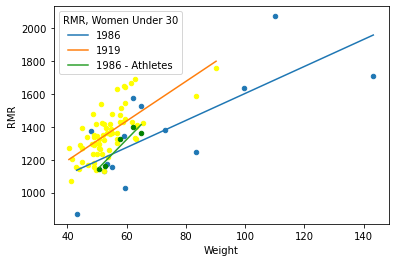

In [95]:
young_women_1992 = df[(df['Yr']==1992) & (df['Age']<30) & (df['IS_ATHLETE']!="*")]
z = np.polyfit(x=young_women_1992['Weight'], y=young_women_1992['RMR'], deg=1)
p = np.poly1d(z)
young_women_1992['trendline'] = p(young_women_1992['Weight'])
young_women_1992.head()
plot1 = young_women_1992.plot(x='Weight', y='RMR', kind='scatter', label='1986')
plot1.legend(title = "RMR, Women Under 30")
young_women_1992.set_index('Weight', inplace=True)
young_women_1992.trendline.sort_index(ascending=False).plot(ax=plot1)


young_women_1919 = df[(df['Yr']==1919) & (df['Age']<30)]

z = np.polyfit(x=young_women_1919['Weight'], y=young_women_1919['RMR'], deg=1)
p = np.poly1d(z)
young_women_1919['trendline'] = p(young_women_1919['Weight'])
young_women_1919.head()
plot2 = young_women_1919.plot(x='Weight', y='RMR', kind='scatter', color='yellow', label='1919', ax=plot1)

young_women_1919.set_index('Weight', inplace=True)
young_women_1919.trendline.sort_index(ascending=False).plot(ax=plot1)

young_athletes_1992 = df[(df['Yr']==1992) & (df['Age']<30) & (df['IS_ATHLETE']=="*")]
z = np.polyfit(x=young_athletes_1992['Weight'], y=young_athletes_1992['RMR'], deg=1)
p = np.poly1d(z)
young_athletes_1992['trendline'] = p(young_athletes_1992['Weight'])
plot1 = young_athletes_1992.plot(x='Weight', y='RMR', kind='scatter', color="green", label='1986 - Athletes', ax=plot1)
young_athletes_1992.set_index('Weight', inplace=True)
young_athletes_1992.trendline.sort_index(ascending=False).plot(ax=plot1)

<ipython-input-96-cfeed43864c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  older_women_1992['trendline'] = p(older_women_1992['Weight'])
<ipython-input-96-cfeed43864c7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  older_women_1919['trendline'] = p(older_women_1919['Weight'])


<AxesSubplot:xlabel='Weight', ylabel='RMR'>

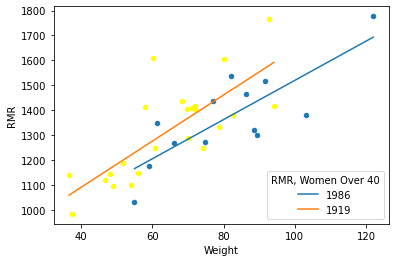

In [96]:
older_women_1992 = df[(df['Yr']==1992) & (df['Age']>40)]
z = np.polyfit(x=older_women_1992['Weight'], y=older_women_1992['RMR'], deg=1)
p = np.poly1d(z)
older_women_1992['trendline'] = p(older_women_1992['Weight'])
plot1 = older_women_1992.plot(x='Weight', y='RMR', kind='scatter', label='1986')

plot1.legend(title = "RMR, Women Over 40")
plot1.set_xlabel('Weight (kg)')
plot1.set_ylabel('RMR (cal/day)')

older_women_1992.set_index('Weight', inplace=True)
older_women_1992.trendline.sort_index(ascending=False).plot(ax=plot1, label='1986')

older_women_1919 = df[(df['Yr']==1919) & (df['Age']>40)]

z = np.polyfit(x=older_women_1919['Weight'], y=older_women_1919['RMR'], deg=1)
p = np.poly1d(z)
older_women_1919['trendline'] = p(older_women_1919['Weight'])
older_women_1919.head()
plot2 = older_women_1919.plot(x='Weight', y='RMR', kind='scatter', color='yellow', label='1919',  ax=plot1)

older_women_1919.set_index('Weight', inplace=True)
older_women_1919.trendline.sort_index(ascending=False).plot(ax=plot1)


In [77]:
np.mean(young_women_1992['RMR/Kg'])

20.757894736842104

In [78]:
np.mean(young_women_1919['RMR/Kg'])

25.601492537313433

In [81]:
t, p =  f_oneway(young_women_1919['RMR/Kg'], young_women_1992['RMR/Kg'])
p

6.693593689590987e-09